# Relatório EP1 - Computação Paralela e Concorrente

**Alunos**: 
- Erick Rodrigues de Santana, NUSP: 11222008
- Francisco Eugênio Wernke, NUSP: 11221870
- Thiago Guerrero Balera, NUSP: 11275297
- Vinicius Pereira Ximenes Frota, NUSP: 11221967

**Professor**: Alfredo Goldman

**Monitores**: Elisa Silva e Luciana Marques

O relatório a seguir foi elaborado com base nas instruções do EP1 da Matéria MAC0219 - Computação Paralela e Concorrente. Vamos explicitar aqui, somente os resultados do experimento realizado e demonstrar como a paralelização de algoritmos otimiza o tempo em computadores multicore.

### Executando o programa
Para executar o programa mandelbrot nas versões paralelizáveis (OpenMP e Pthreads), adicionamos um argumento extra para definir o número de threads a serem criadas. Execute com o seguinte formato:
```bash
./mandelbrot_pth c_x_min c_x_max c_y_min c_y_max image_size num_threads
./mandelbrot_omp c_x_min c_x_max c_y_min c_y_max image_size num_threads
```

In [1]:
# Bibliotecas importadas
using CSV
using DataFrames
using Plots

# Leitura de dados CSV
csv = CSV.read("../measurements/data.csv", DataFrame)
print(csv)

5200×6 DataFrame
  Row │ tipo    tamanho  threads  tempo           io         figura             
      │ String  Int64    Int64    Float64         Float64    String             
──────┼─────────────────────────────────────────────────────────────────────────
    1 │ seq          16        1       0.056505     48.7926  full
    2 │ seq          16        1       0.152588     76.9372  full
    3 │ seq          16        1       0.132561     64.899   full
    4 │ seq          16        1       0.152349     53.5328  full
    5 │ seq          16        1       0.153542     53.5104  full
    6 │ seq          16        1       0.140667     53.6222  full
    7 │ seq          16        1       0.132561     53.7527  full
    8 │ seq          16        1       0.153303     53.5026  full
    9 │ seq          16        1       0.153065     53.551   full
   10 │ seq          16        1       0.152588     53.5407  full
   11 │ seq          16        1       0.862122     50.4673  seahorseValley
   1

 1707 │ pth          64        8      54.3954        0.0     elephantValley
 1708 │ pth          64        8      54.6594        0.0     elephantValley
 1709 │ pth          64        8     254.951         0.0     elephantValley
 1710 │ pth          64        8     646.722         0.0     elephantValley
 1711 │ pth          64        8     176.789         0.0     tripleSpiralValley
 1712 │ pth          64        8      55.7959        0.0     tripleSpiralValley
 1713 │ pth          64        8      54.5325        0.0     tripleSpiralValley
 1714 │ pth          64        8      65.5963        0.0     tripleSpiralValley
 1715 │ pth          64        8      65.4817        0.0     tripleSpiralValley
 1716 │ pth          64        8      66.0405        0.0     tripleSpiralValley
 1717 │ pth          64        8      65.5391        0.0     tripleSpiralValley
 1718 │ pth          64        8      65.8133        0.0     tripleSpiralValley
 1719 │ pth          64        8      54.4825        0.0

 2564 │ pth         256       32     201.05          0.0     full
 2565 │ pth         256       32     111.618         0.0     full
 2566 │ pth         256       32     117.887         0.0     full
 2567 │ pth         256       32     253.824         0.0     full
 2568 │ pth         256       32     247.889         0.0     full
 2569 │ pth         256       32     210.964         0.0     full
 2570 │ pth         256       32     713.202         0.0     full
 2571 │ pth         256       32     225.63          0.0     seahorseValley
 2572 │ pth         256       32      87.1058        0.0     seahorseValley
 2573 │ pth         256       32      99.9057        0.0     seahorseValley
 2574 │ pth         256       32      87.2803        0.0     seahorseValley
 2575 │ pth         256       32      89.1211        0.0     seahorseValley
 2576 │ pth         256       32      98.3105        0.0     seahorseValley
 2577 │ pth         256       32      87.2264        0.0     seahorseValley
 2578 

 3421 │ omp         512        2     329.893         0.0     elephantValley
 3422 │ omp         512        2     498.056         0.0     elephantValley
 3423 │ omp         512        2     598.972         0.0     elephantValley
 3424 │ omp         512        2     366.507         0.0     elephantValley
 3425 │ omp         512        2     402.035         0.0     elephantValley
 3426 │ omp         512        2     329.988         0.0     elephantValley
 3427 │ omp         512        2     479.778         0.0     elephantValley
 3428 │ omp         512        2     417.395         0.0     elephantValley
 3429 │ omp         512        2     374.69          0.0     elephantValley
 3430 │ omp         512        2     724.296         0.0     elephantValley
 3431 │ omp         512        2     439.846         0.0     tripleSpiralValley
 3432 │ omp         512        2     410.143         0.0     tripleSpiralValley
 3433 │ omp         512        2     396.24          0.0     tripleSpiralValley


 4277 │ omp        1024        8     758.659         0.0     tripleSpiralValley
 4278 │ omp        1024        8     613.03          0.0     tripleSpiralValley
 4279 │ omp        1024        8    1134.75          0.0     tripleSpiralValley
 4280 │ omp        1024        8     552.288         0.0     tripleSpiralValley
 4281 │ omp        2048        8    1046.62          0.0     full
 4282 │ omp        2048        8     971.473         0.0     full
 4283 │ omp        2048        8    1627.29          0.0     full
 4284 │ omp        2048        8     901.132         0.0     full
 4285 │ omp        2048        8     929.423         0.0     full
 4286 │ omp        2048        8    1030.17          0.0     full
 4287 │ omp        2048        8    1713.9           0.0     full
 4288 │ omp        2048        8    1045.83          0.0     full
 4289 │ omp        2048        8    1230.05          0.0     full
 4290 │ omp        2048        8     943.872         0.0     full
 4291 │ omp        2

 5134 │ omp        4096       32    4005.59          0.0     seahorseValley
 5135 │ omp        4096       32    3959.25          0.0     seahorseValley
 5136 │ omp        4096       32    3973.58          0.0     seahorseValley
 5137 │ omp        4096       32    4246.83          0.0     seahorseValley
 5138 │ omp        4096       32    3978.45          0.0     seahorseValley
 5139 │ omp        4096       32    3782.09          0.0     seahorseValley
 5140 │ omp        4096       32    3968.95          0.0     seahorseValley
 5141 │ omp        4096       32    3805.6           0.0     elephantValley
 5142 │ omp        4096       32    4285.45          0.0     elephantValley
 5143 │ omp        4096       32    4403.38          0.0     elephantValley
 5144 │ omp        4096       32    4281.61          0.0     elephantValley
 5145 │ omp        4096       32    4090.28          0.0     elephantValley
 5146 │ omp        4096       32    3728.93          0.0     elephantValley
 5147 │ omp 

### Organização dos dados

Para agrupar os dados coletados usamos dicionários, a estrutura pode ser entendida assim:
```js
{
    seq: {
        full: {
            Tamanho de entrada(2^4...2^13): Pair<Média, Intervalo de confiança>
        },
        seahorseValley: ... ,
        elephantValley: ... ,
        tripleSpiralValley: ...
    },
    pth: {
        full: {
            Tamanho de entrada(2^4...2^13): [
                2^0 threads: Pair<Média, Intervalo de confiança>,
                2^1 threads: Pair<Média, Intervalo de confiança>,
                ... ,
                2^5 threads: Pair<Média, Intervalo de confiança>
            ]
        },
        seahorseValley: ... ,
        elephantValley: ... ,
        tripleSpiralValley: ...
    },
    omp: ...Igual a pthread
}
```

In [2]:
data = Dict();
data["seq"] = Dict("full"=>Dict(), "seahorseValley"=>Dict(), "elephantValley"=>Dict(), "tripleSpiralValley"=>Dict());
data["seqio"] = Dict("full"=>Dict(), "seahorseValley"=>Dict(), "elephantValley"=>Dict(), "tripleSpiralValley"=>Dict());
data["pth"] = Dict("full"=>Dict(), "seahorseValley"=>Dict(), "elephantValley"=>Dict(), "tripleSpiralValley"=>Dict());
data["omp"] = Dict("full"=>Dict(), "seahorseValley"=>Dict(), "elephantValley"=>Dict(), "tripleSpiralValley"=>Dict());

keys = ["full", "seahorseValley", "elephantValley", "tripleSpiralValley"];
for i in 4:13
     for t in keys
         pair = 1 => 0;
         data["seq"][t][2^i] = pair;
         data["seqio"][t][2^i] = pair;
         data["pth"][t][2^i] = Pair{Float64, Float64}[];
         data["omp"][t][2^i] = Pair{Float64, Float64}[];
     end
end

### Intervalo de confiança

Como o intervalo de confiança é simétrico em torno da média, só retornamos os limiares. Para 95% de nível de confiança e 9 graus de liberdade, obtemos pela tabela da t-student o valor 2.2622 para z.


In [3]:
function confidence_interval(vector, mean)
    z = 2.2622;
    n = length(vector);
    sigma = 0;
    for i in 1:n
        sigma += (vector[i] - mean)^2;
    end
    sigma /= n-1;
    sigma = sqrt(sigma);
    return z * sigma/sqrt(n);
end;

In [4]:
size = nrow(csv)

for i in 11:10:size+1
    tipo = csv.tipo[i-1];
    figura = csv.figura[i-1];
    tamanho = csv.tamanho[i-1];
    threads = csv.threads[i-1];
    if (tipo == "seq")
        vector = vcat(csv.tempo[i-10:i-1], csv.io[i-10:i-1]);
        sum = reduce(+, vector);
        pair = sum/10 => confidence_interval(vector, sum/10);
        data["seqio"][figura][tamanho] = pair;

        sum  = reduce(+, csv.tempo[i-10:i-1]);
        pair = sum/10 => confidence_interval(csv.tempo[i-10:i-1], sum/10);
        data[tipo][figura][tamanho] = pair;
    else
        sum  = reduce(+, csv.tempo[i-10:i-1]);
        pair = sum/10 => confidence_interval(csv.tempo[i-10:i-1], sum/10);
        push!(data[tipo][figura][tamanho], pair);
    end
end

In [5]:
x = [];
for i in 4:13
    append!(x, 2^i);
end

In [6]:
function plot_by_number_of_threads(threads)
    id = convert(Int64, log2(threads) + 1);
    for tipo in keys
        plot_seq = [];
        interval_seq = [];
        plot_pth = [];
        interval_pth = [];
        plot_omp = [];
        interval_omp = [];
        for i in 4:13
            append!(plot_seq, data["seq"][tipo][2^i].first);
            append!(plot_pth, data["pth"][tipo][2^i][id].first);
            append!(plot_omp, data["omp"][tipo][2^i][id].first);

            append!(interval_seq, data["seq"][tipo][2^i].second);
            append!(interval_pth, data["pth"][tipo][2^i][id].second);
            append!(interval_omp, data["omp"][tipo][2^i][id].second);
        end
        title = string(threads) * " Thread(s) - " * tipo;
        g = plot(x, plot_seq[plot_seq.>0], title=title, label= "seq", lw = 1, legend=:bottomright,
            linecolor="#e87500", fillcolor="orange",
            xaxis = :log10, yaxis=(:log10, [0.1, :auto]),
            ribbon = (interval_seq, interval_seq))
        
        
         g = plot!(x,  plot_pth[plot_pth.>0], label= "pth", lw = 1, legend=:bottomright,
            linecolor="#000396", fillcolor="#07ffc0",
            xaxis = :log10, yaxis=(:log10, [0.1, :auto]),
            ribbon = (interval_pth, interval_pth))
        
         g = plot!(x, plot_omp[plot_omp.>0], label= "omp", lw = 1, legend=:bottomright,
            linecolor="#e84a4a", fillcolor="#29a7e1",
            xaxis = :log10, yaxis=(:log10, [0.1, :auto]),
            ribbon = (interval_omp, interval_omp))
        
        xlabel!("Tamanho da entrada")
        ylabel!("Tempo(ms)")
        display(g)
    end
end;


In [30]:
function plot_by_number_of_threads(threads)
    id = convert(Int64, log2(threads) + 1);
    for tipo in keys
        plot_seq = [];
        interval_seq = [];
        plot_pth = [];
        interval_pth = [];
        plot_omp = [];
        interval_omp = [];
        for i in 4:13
            append!(plot_seq, data["seq"][tipo][2^i].first);
            append!(plot_pth, data["pth"][tipo][2^i][id].first);
            append!(plot_omp, data["omp"][tipo][2^i][id].first);

            append!(interval_seq, data["seq"][tipo][2^i].second);
            append!(interval_pth, data["pth"][tipo][2^i][id].second);
            append!(interval_omp, data["omp"][tipo][2^i][id].second);
        end
        title = string(threads) * " Thread(s) - " * tipo;
        
        values_font = Plots.font("Helvetica", 6)
        text_font = Plots.font("Helvetica", 8)
        
        g = plot(x, plot_seq[plot_seq.>0], label= "seq", lw = 1, legend=:bottomright,
            linecolor="#e87500", fillcolor="orange",
            xaxis = :log10, yaxis=(:log10, [0.1, :auto]),
            ribbon = (interval_seq, interval_seq),
            ylabel="Tempo(ms)")
        
        
         h = plot(x,  plot_pth[plot_pth.>0], title=title, label= "pth", lw = 1, legend=:bottomright,
            linecolor="#000396", fillcolor="#07ffc0",
            xaxis = :log10, yaxis=(:log10, [0.1, :auto]),
            ribbon = (interval_pth, interval_pth))
        
         i = plot(x, plot_omp[plot_omp.>0], label= "omp", lw = 1, legend=:bottomright,
            linecolor="#e84a4a", fillcolor="#29a7e1",
            xaxis = :log10, yaxis=(:log10, [0.1, :auto]),
            ribbon = (interval_omp, interval_omp))
        
        final_plot = plot(g, h, i, size=(750, 350), layout=(1, 3),
            guidefont=values_font, xtickfont=values_font, ytickfont=values_font, titlefont=text_font,
            xlabel="Tamanho da entrada")
        
        display(final_plot)
    end
end;


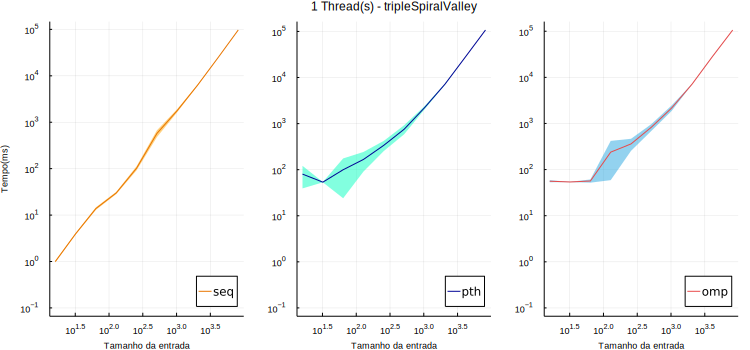

In [31]:
plot_by_number_of_threads(2^0)

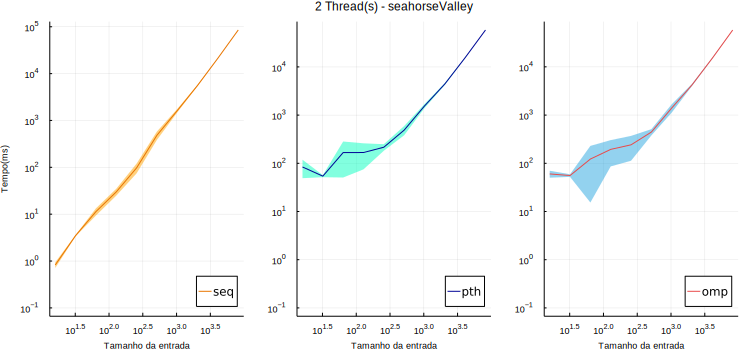

In [32]:
plot_by_number_of_threads(2^1)

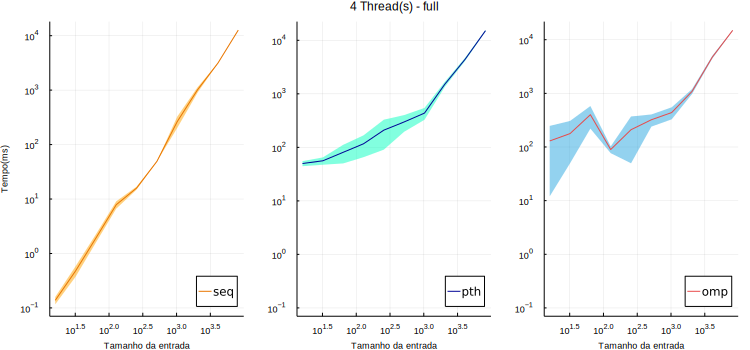

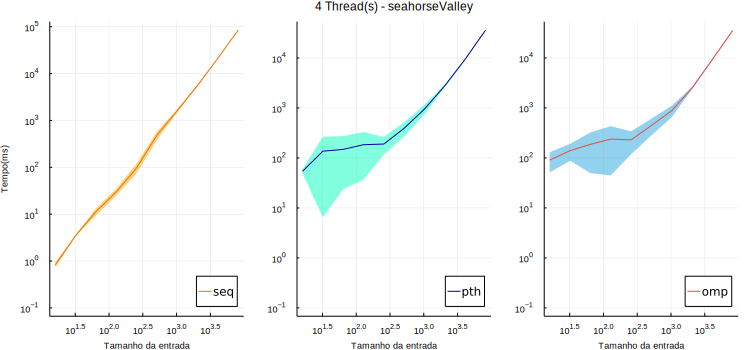

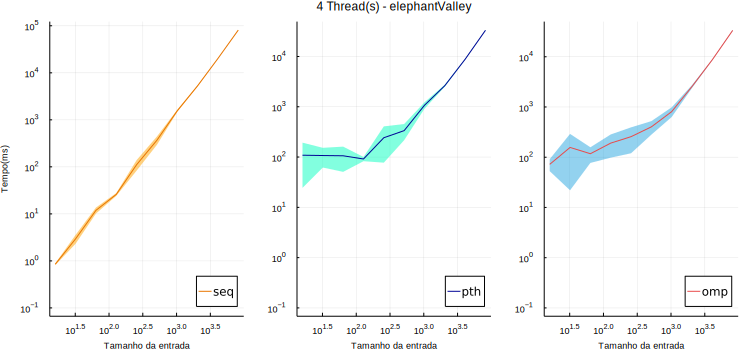

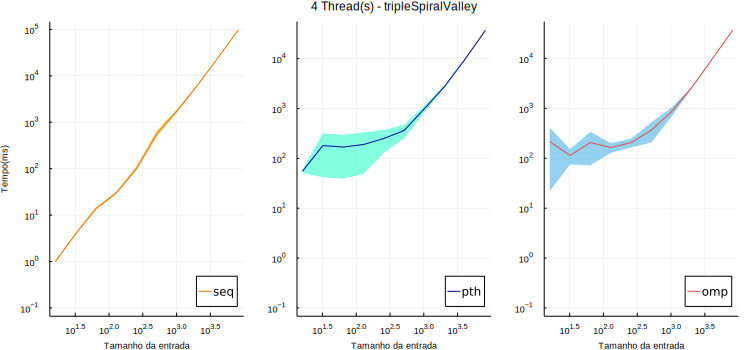

In [33]:
plot_by_number_of_threads(2^2)

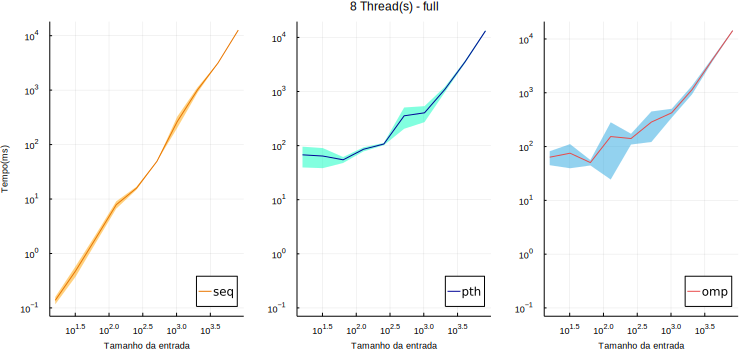

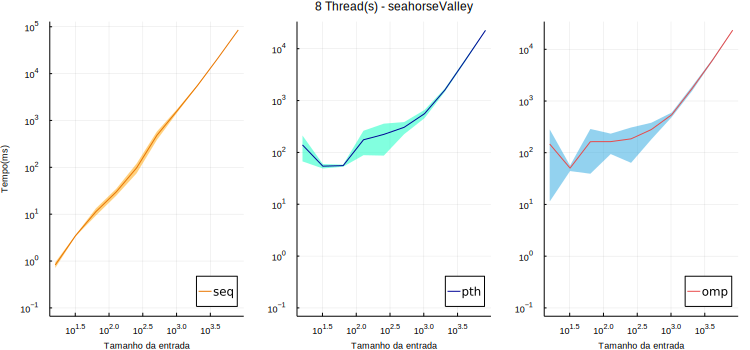

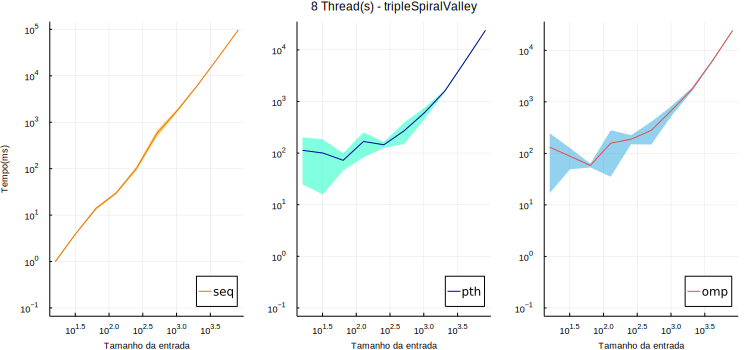

In [34]:
plot_by_number_of_threads(2^3)

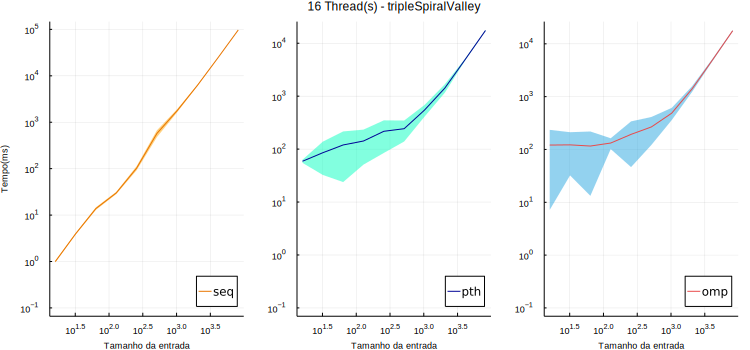

In [35]:
plot_by_number_of_threads(2^4)

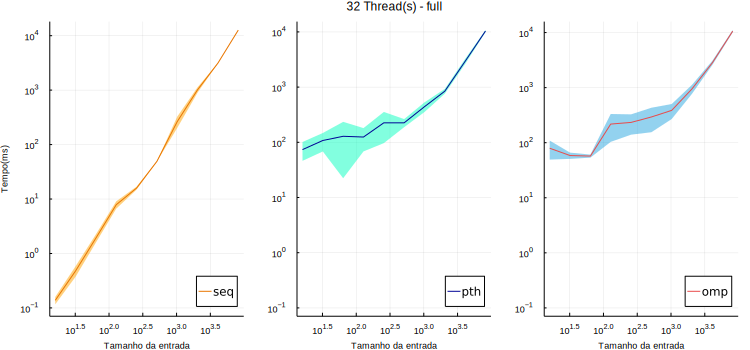

In [36]:
plot_by_number_of_threads(2^5)